In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, Normalize

In [2]:
# strip metadata and data dictionaries
def read_data(filename : str = None):
    fh = open(filename)

    # This one has the top few lines as a Python dictionary
    metadata = {}

    # The array data goes in here, with keys representing the variable name
    data = {}

    # Must specify the list of variables that are given as arrays
    variables = ["A","B","C","D","F"]

    # Grab the top part which is mostly metadata
    reached_data = False
    while not reached_data:
        line = fh.readline()

        # Get rid of the end-of-line newlines
        tmp = line.strip()

        # Skip blank lines
        if len(tmp)<1:
            continue    

        # Split on the first occurence of the ":" character
        tmp = tmp.split(":", 1)
        if tmp[0] not in variables:
            metadata[tmp[0]] = tmp[1]
        else:
            reached_data = True

    # Handle the data part
    reached_eof = False
    while not reached_eof:
        # Note that 'tmp' still has the first variable name in it from above
        if tmp[0] in variables:
            current_var = tmp[0]
            data[current_var] = []
        else:
            # This gets rid of the "0:", etc
            new_values = tmp[1].split()
            data[current_var].extend(new_values)

        line = fh.readline()
        if line=="":
            reached_eof = True        
        tmp = line.strip().split(":", 1)      

    # Convert the values from strings to floats
    for key in data.keys():
        data[key] = [float(x) for x in data[key]]
   
    fh.close()
    
    return (metadata, data)

In [3]:
# define filepaths
glob_results_sorted = sorted(glob.glob('/Users/c3130167/Documents/Uni Work/Post Doc Rutgers/Manuscripts in preparation/Celsr3 Behavior Paper/CRF Heatmap/CRF MedAssoc Files/MT - Day 1/*.txt'))
files = glob_results_sorted

# open dataframes
all_metadata = []
all_rawdata = []

# read files
for file in files:
    (metadata, data) = read_data(file)
    all_metadata.append(metadata.copy())
    all_rawdata.append(data.copy())

In [4]:
# eyeball data
print(type(all_rawdata))
print(all_rawdata)

<class 'list'>
[{'A': [90.0, 30.0], 'B': [98.45, 473.19, 699.86, 1453.41, 1792.57, 2028.31, 2092.49, 2151.39, 2292.98, 2408.55, 2474.12, 2564.44, 2640.72, 2650.6, 2798.54, 3002.16, 3117.52, 3318.66, 3467.03, 3620.06, 3695.11, 3738.89, 4086.81, 4238.97, 4578.65, 4613.34], 'C': [358.06, 583.58, 789.02, 1551.51, 1797.07, 2031.59, 2098.72, 2177.17, 2296.26, 2440.58, 2506.32, 2578.61, 2643.37, 2785.85, 2872.3, 3021.78, 3182.32, 3342.29, 3512.79, 3635.94, 3707.6, 3781.54, 4093.02, 4460.93, 4583.79, 4709.72], 'D': [259.61, 110.39, 89.16, 98.1, 4.5, 3.28, 6.23, 25.78, 3.28, 32.03, 32.2, 14.17, 2.65, 135.25, 73.76, 19.62, 64.8, 23.63, 45.76, 15.88, 12.49, 42.65, 6.21, 221.96, 5.14, 96.38]}, {'A': [90.0, 30.0], 'B': [179.68, 234.22, 310.97, 564.93, 700.41, 883.46, 1179.14, 1309.83, 1719.54, 1805.38, 1967.85, 2565.27, 3088.0, 3185.16, 3228.39, 3534.67, 3748.96, 4159.41, 4284.91, 4563.03, 4855.48, 4953.06], 'C': [216.29, 264.72, 395.31, 601.07, 711.76, 909.13, 1198.78, 1330.29, 1734.35, 1810.08, 1

In [5]:
# grab the nosepoke timestamps in the B array for lists 0-18 and then the F array for lists 19-26
chosen_rawdata = []
for i in range(len(all_rawdata)):
    if i <= 23: 
        temp_list = all_rawdata[i]['B']
        chosen_rawdata.append(temp_list)
    else: 
        temp_list = all_rawdata[i]['F']
        chosen_rawdata.append(temp_list)

print(chosen_rawdata)

[[98.45, 473.19, 699.86, 1453.41, 1792.57, 2028.31, 2092.49, 2151.39, 2292.98, 2408.55, 2474.12, 2564.44, 2640.72, 2650.6, 2798.54, 3002.16, 3117.52, 3318.66, 3467.03, 3620.06, 3695.11, 3738.89, 4086.81, 4238.97, 4578.65, 4613.34], [179.68, 234.22, 310.97, 564.93, 700.41, 883.46, 1179.14, 1309.83, 1719.54, 1805.38, 1967.85, 2565.27, 3088.0, 3185.16, 3228.39, 3534.67, 3748.96, 4159.41, 4284.91, 4563.03, 4855.48, 4953.06], [432.95, 1150.16, 1314.12, 1456.92, 1757.02, 2484.77, 2796.93, 3816.26, 4360.63, 4776.61, 4972.73, 5274.14], [381.39, 1546.31, 1755.61, 2260.23, 2395.32, 2907.0, 4043.01, 5377.06], [71.7, 141.12, 184.28, 360.67, 587.57, 1006.74, 1223.88, 1349.97, 1378.78, 1454.28, 1530.25, 1694.43, 1735.83, 1766.51, 1822.87, 1959.25, 2099.27, 2286.52, 2333.52, 2495.56, 2775.61, 3052.52, 3123.54, 3153.19, 3194.71, 3215.29, 3289.99, 3309.19, 3331.82, 3350.94], [163.35, 500.59, 1274.22, 2380.46, 2714.57, 2778.33, 2931.8, 3024.56, 3156.75, 3221.77, 3399.38, 3451.2, 3481.25, 3600.69, 3638.6

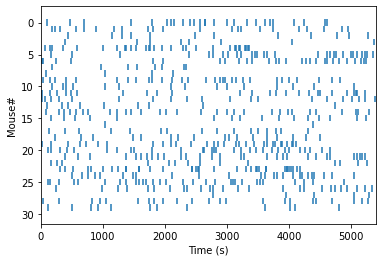

In [6]:
# plot the timestamps as an event plot
CRF_raster = np.array(chosen_rawdata, dtype=object)
plt.eventplot(CRF_raster)
plt.xlabel("Time (s)")
plt.ylabel("Mouse#")
plt.gca().invert_yaxis()
plt.xlim([0,5400])

# show the plot
plt.show()

In [7]:
#calculate the inter-poke-intervals
diff_list = []
for sublist in chosen_rawdata:
    arr = np.array(sublist)
    diff_arr = np.diff(arr)
    diff_list.append(diff_arr.tolist())

print(diff_list)

[[374.74, 226.67000000000002, 753.5500000000001, 339.15999999999985, 235.74, 64.17999999999984, 58.90000000000009, 141.59000000000015, 115.57000000000016, 65.56999999999971, 90.32000000000016, 76.27999999999975, 9.88000000000011, 147.94000000000005, 203.6199999999999, 115.36000000000013, 201.13999999999987, 148.37000000000035, 153.02999999999975, 75.05000000000018, 43.779999999999745, 347.9200000000001, 152.1600000000003, 339.6799999999994, 34.69000000000051], [54.53999999999999, 76.75000000000003, 253.95999999999992, 135.48000000000002, 183.05000000000007, 295.68000000000006, 130.68999999999983, 409.71000000000004, 85.84000000000015, 162.4699999999998, 597.4200000000001, 522.73, 97.15999999999985, 43.23000000000002, 306.2800000000002, 214.28999999999996, 410.4499999999998, 125.5, 278.1199999999999, 292.4499999999998, 97.58000000000084], [717.21, 163.9599999999998, 142.80000000000018, 300.0999999999999, 727.75, 312.15999999999985, 1019.3300000000004, 544.3699999999999, 415.979999999999

In [8]:
# convert the inter-poke intervals
for lst in diff_list:
    for i in range(len(lst)):
        lst[i] = lst[i]/60

print(diff_list)

[[6.245666666666667, 3.7778333333333336, 12.559166666666668, 5.652666666666664, 3.9290000000000003, 1.0696666666666639, 0.9816666666666681, 2.3598333333333357, 1.9261666666666695, 1.0928333333333284, 1.505333333333336, 1.271333333333329, 0.1646666666666685, 2.465666666666668, 3.393666666666665, 1.9226666666666687, 3.3523333333333314, 2.472833333333339, 2.5504999999999955, 1.2508333333333364, 0.7296666666666625, 5.7986666666666675, 2.5360000000000054, 5.661333333333323, 0.5781666666666752], [0.9089999999999999, 1.2791666666666672, 4.232666666666665, 2.2580000000000005, 3.0508333333333346, 4.928000000000001, 2.1781666666666637, 6.828500000000001, 1.4306666666666692, 2.70783333333333, 9.957, 8.712166666666667, 1.6193333333333308, 0.7205000000000003, 5.10466666666667, 3.5714999999999995, 6.840833333333331, 2.091666666666667, 4.635333333333332, 4.874166666666664, 1.6263333333333472], [11.9535, 2.7326666666666637, 2.380000000000003, 5.001666666666665, 12.129166666666666, 5.202666666666664, 1

In [9]:
# inverse of the values to get the rate
for values in diff_list:
    for i in range(len(values)):
        values[i] = 1/values[i]

print(diff_list)

[[0.160111010300475, 0.2647019896766224, 0.07962311724504013, 0.17690765420450533, 0.25451768897938404, 0.9348706762231249, 1.018675721561968, 0.4237587400240126, 0.5191658734965814, 0.9150526155253969, 0.6643046944198393, 0.7865757734661799, 6.072874493927058, 0.4055698256049748, 0.29466653570376206, 0.5201109570041603, 0.29829969175698534, 0.4043944193570119, 0.3920799843168013, 0.7994670219853411, 1.3704888076747452, 0.17245343757185558, 0.39432176656151335, 0.17663683466792307, 1.7296050735081903], [1.1001100110011002, 0.7817589576547228, 0.23625767837454725, 0.44286979627989365, 0.32777929527451505, 0.2029220779220779, 0.45910169102456255, 0.14644504649630224, 0.6989748369058701, 0.3692989474980001, 0.10043185698503565, 0.11478200983299218, 0.6175380815150278, 1.387925052047189, 0.1958991772234555, 0.2799944001119978, 0.14618102083079554, 0.4780876494023904, 0.2157342154465699, 0.20516327577363663, 0.6148800983808105], [0.08365750616974107, 0.3659429129055871, 0.4201680672268902, 

In [10]:
# append 0 to list of lists

for lst in diff_list:
    lst.insert(0,0)
    
print(diff_list)

[[0, 0.160111010300475, 0.2647019896766224, 0.07962311724504013, 0.17690765420450533, 0.25451768897938404, 0.9348706762231249, 1.018675721561968, 0.4237587400240126, 0.5191658734965814, 0.9150526155253969, 0.6643046944198393, 0.7865757734661799, 6.072874493927058, 0.4055698256049748, 0.29466653570376206, 0.5201109570041603, 0.29829969175698534, 0.4043944193570119, 0.3920799843168013, 0.7994670219853411, 1.3704888076747452, 0.17245343757185558, 0.39432176656151335, 0.17663683466792307, 1.7296050735081903], [0, 1.1001100110011002, 0.7817589576547228, 0.23625767837454725, 0.44286979627989365, 0.32777929527451505, 0.2029220779220779, 0.45910169102456255, 0.14644504649630224, 0.6989748369058701, 0.3692989474980001, 0.10043185698503565, 0.11478200983299218, 0.6175380815150278, 1.387925052047189, 0.1958991772234555, 0.2799944001119978, 0.14618102083079554, 0.4780876494023904, 0.2157342154465699, 0.20516327577363663, 0.6148800983808105], [0, 0.08365750616974107, 0.3659429129055871, 0.420168067

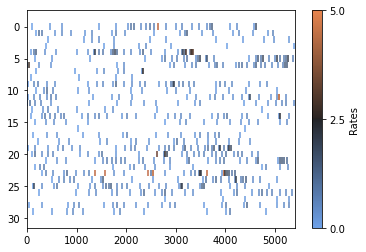

In [11]:
timestamps = chosen_rawdata
rates = diff_list

# Define a diverging color palette using seaborn
palette = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

# Map from counts to colors
norm = mpl.colors.Normalize(0, 5)  # Update normalization range
colors = [palette(norm(r)) for r in rates]

f, ax = plt.subplots()

# Use the seaborn palette for the eventplot
events = ax.eventplot(timestamps, colors=colors, orientation="horizontal", zorder=.5)
events[0].set_norm(norm)

# Use the seaborn palette for the colorbar
cbar = f.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=palette), ax=ax)
cbar.ax.set_ylabel('Rates')
cbar.set_ticks(np.linspace(0, 5, 3))
plt.xlim([0,5400])
plt.gca().invert_yaxis()

# export the graph as an .svg
image_name = 'MT_day1.svg'
image_format = 'svg'
plt.savefig(image_name, format=image_format, dpi=1200)

plt.show()